## Importación

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Carga de datos

In [2]:
path = r'Data'

In [3]:
original_contract_df = pd.read_csv(path+r'\raw_data\contract.csv')
original_internet_df = pd.read_csv(path+r'\raw_data\internet.csv')
original_personal_df = pd.read_csv(path+r'\raw_data\personal.csv')
original_phone_df = pd.read_csv(path+r'\raw_data\phone.csv')

## EDA

### DataFrame contract_df

In [4]:
original_contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
display(original_contract_df.head(10))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [6]:
original_contract_df.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


* El DataFrame __contract_df__ constaba de 7043 filas y 8 columnas y no mostró datos ausentes. 
* Las columnas __BeginDate__ deberían contener variables del tipo __datetime__ y la columna __TotalCharges__ del tipo __float__ y ambas contienen tipo __object__. 
* La columna __EndDate__ contiene variables tipo __object__ sin embargo al ser la columna objetivo en el actual problema de clasificación la respuesta __'No'__ por __1__ y el resto de respuestas a __0__ puesto que se trata de clientes que cancelaron el contrato. 
* La columna __PaymentMethod__ un posible valor es __Bank transfer (automatic)__ la cual podría ser redundante si es el único tipo de de transferencia bancaria que existe y podría simplificarse a __Bank transfer__ en tal caso. 
* Las columnas __Type__, __PaperlessBilling__ y __PaymenteMethod__ contiene valores que no respeta el formato snakecase por lo que se modificaron para respetar dicho formato y entonces realizar un análisis para evidenciar la existencia de duplicados.

#### Corregir datos

In [7]:
contract_df = original_contract_df.copy()
contract_df.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [8]:
contract_df = contract_df.rename(columns={
    'customerID':'Customer_ID',
    'BeginDate': 'Begin_Date',
    'EndDate': 'End_Date',
    'Type':'Type',
    'PaperlessBilling':'Paperless_Billing',
    'PaymentMethod':'Payment_Method',
    'MonthlyCharges':'Monthly_Charges',
    'TotalCharges': 'Total_Charges'
})

In [9]:
contract_df.head()

,Customer_ID,Begin_Date,End_Date,Type,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [10]:
contract_df.isna().sum()

Customer_ID          0
Begin_Date           0
End_Date             0
Type                 0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
dtype: int64

In [11]:
dup_contract_df = contract_df.duplicated(subset=['Customer_ID']).sum()
print(f'La cantidad de filas duplicadas en el dataframe es :{dup_contract_df}')

La cantidad de filas duplicadas en el dataframe es :0


#### Columna 'Begin_Date'
Se cambió el tipo de variable de __object__ a tipo __datetime__

In [12]:
print(contract_df['Begin_Date'].unique())

['2020-01-01' '2017-04-01' '2019-10-01' '2016-05-01' '2019-09-01'
 '2019-03-01' '2018-04-01' '2019-04-01' '2017-07-01' '2014-12-01'
 '2019-01-01' '2018-10-01' '2015-04-01' '2015-09-01' '2018-01-01'
 '2014-05-01' '2015-10-01' '2014-03-01' '2018-05-01' '2019-11-01'
 '2019-02-01' '2016-01-01' '2017-08-01' '2015-12-01' '2014-02-01'
 '2018-06-01' '2019-12-01' '2017-11-01' '2019-06-01' '2016-04-01'
 '2017-02-01' '2018-12-01' '2014-04-01' '2018-09-01' '2014-11-01'
 '2016-07-01' '2015-02-01' '2018-07-01' '2014-08-01' '2016-03-01'
 '2018-08-01' '2014-10-01' '2015-06-01' '2016-08-01' '2019-05-01'
 '2017-03-01' '2016-02-01' '2017-09-01' '2014-09-01' '2017-12-01'
 '2016-12-01' '2017-06-01' '2015-05-01' '2016-10-01' '2016-09-01'
 '2019-08-01' '2019-07-01' '2017-05-01' '2017-10-01' '2014-07-01'
 '2018-03-01' '2015-01-01' '2018-11-01' '2015-03-01' '2018-02-01'
 '2016-06-01' '2015-08-01' '2015-11-01' '2014-06-01' '2017-01-01'
 '2015-07-01' '2020-02-01' '2016-11-01' '2013-11-01' '2014-01-01'
 '2013-10-

In [13]:
contract_df['Begin_Date'] = pd.to_datetime(contract_df['Begin_Date'], format='%Y-%m-%d')
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        7043 non-null   object        
 1   Begin_Date         7043 non-null   datetime64[ns]
 2   End_Date           7043 non-null   object        
 3   Type               7043 non-null   object        
 4   Paperless_Billing  7043 non-null   object        
 5   Payment_Method     7043 non-null   object        
 6   Monthly_Charges    7043 non-null   float64       
 7   Total_Charges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


In [14]:
print(contract_df['Begin_Date'].value_counts(ascending=True))
print('La fecha de apertura de contrato más antigua es: ', contract_df['Begin_Date'].min())
print('La fecha de apertura de contrato más reciente es: ', contract_df['Begin_Date'].max())

Begin_Date
2013-11-01      2
2013-12-01      3
2013-10-01      3
2014-01-01      7
2020-02-01     11
             ... 
2020-01-01    233
2019-11-01    237
2019-09-01    237
2019-10-01    237
2014-02-01    366
Name: count, Length: 77, dtype: int64
La fecha de apertura de contrato más antigua es:  2013-10-01 00:00:00
La fecha de apertura de contrato más reciente es:  2020-02-01 00:00:00


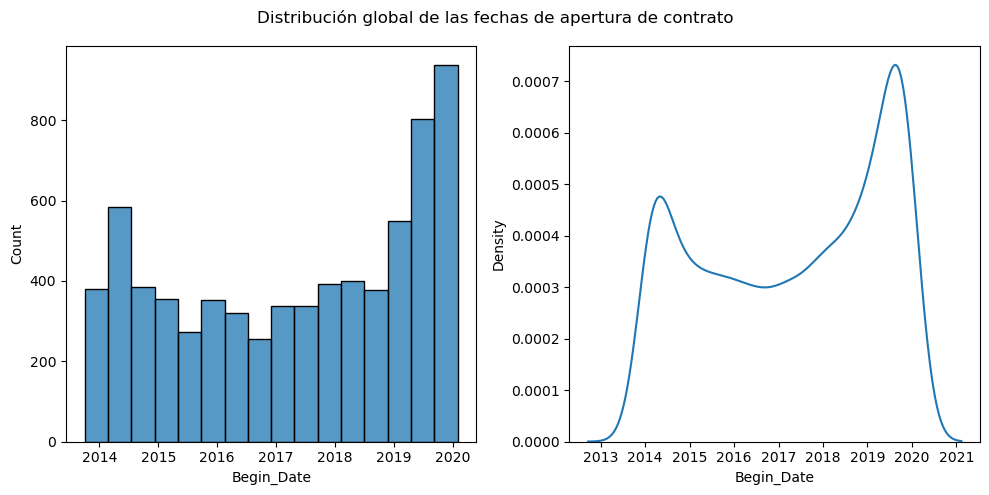

In [15]:
#Histrograma y boxplot para el analisis de fechas iniciales
figura, cuadrantes = plt.subplots(1,2, figsize=(10, 5))

sns.histplot(data=contract_df, x='Begin_Date', ax=cuadrantes[0])
sns.kdeplot(data=contract_df, x='Begin_Date', ax=cuadrantes[1])

figura.suptitle('Distribución global de las fechas de apertura de contrato')

plt.tight_layout()
plt.show()

Se observó que la fechas de apertura de contratos abarcan desde __2013-10-01__ hasta __2020-02-01__. En 2014 hubo un aumento en la cantidad de contratos abiertos pero dicha tendencia disminuyo desde 2015 y se mantuvo a la baja hasta 2017. A partir de 2017 se incrmento gradualmente la cantidad de contratos abiertos llegando a un máximo hasta a principios de 2020. 
Considerando el comportamiento entre 2014 y 2020 en la apertura de contratos podemos observar que podría estar repitiendose un comportamiento del 2014 y 2020.

#### Columna 'End_Date'

In [16]:
contract_df['End_Date'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [17]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        7043 non-null   object        
 1   Begin_Date         7043 non-null   datetime64[ns]
 2   End_Date           7043 non-null   object        
 3   Type               7043 non-null   object        
 4   Paperless_Billing  7043 non-null   object        
 5   Payment_Method     7043 non-null   object        
 6   Monthly_Charges    7043 non-null   float64       
 7   Total_Charges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


El problema sólo marca que se debe de considerar válidos los contratos hasta el __2020-02-01__ por lo que se puede consdierar que los valores __No__ en realidad corresónden a dicha fecha.
 Las fechas de cancelación en orden cronológico fueron:
| End_Date   |
|:----------:|
| 2019-10-01 |
| 2019-11-01 |
| 2019-12-01 |
| 2020-01-01 |

In [18]:
#Cambio de 'No' por '2020-02-01 00:00:00'
contract_df['End_Date'] = contract_df['End_Date'].replace('No', '2020-02-01 00:00:00')
display(contract_df.head(10))

,Customer_ID,Begin_Date,End_Date,Type,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,7590-VHVEG,2020-01-01,2020-02-01 00:00:00,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,2020-02-01 00:00:00,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,2020-02-01 00:00:00,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,2020-02-01 00:00:00,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,2020-02-01 00:00:00,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,2020-02-01 00:00:00,One year,No,Bank transfer (automatic),56.15,3487.95


In [19]:
# Cambio a datetime
contract_df['End_Date'] = pd.to_datetime(contract_df['End_Date'], format='%Y-%m-%d %H:%M:%S')
contract_df.info()
print()
print(contract_df['End_Date'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        7043 non-null   object        
 1   Begin_Date         7043 non-null   datetime64[ns]
 2   End_Date           7043 non-null   datetime64[ns]
 3   Type               7043 non-null   object        
 4   Paperless_Billing  7043 non-null   object        
 5   Payment_Method     7043 non-null   object        
 6   Monthly_Charges    7043 non-null   float64       
 7   Total_Charges      7043 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 440.3+ KB

<DatetimeArray>
['2020-02-01 00:00:00', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
 '2019-10-01 00:00:00', '2020-01-01 00:00:00']
Length: 5, dtype: datetime64[ns]


In [20]:
#Eliminar la parte de la hora y dejando sólo la fecha
contract_df['End_Date'] = contract_df['End_Date'].dt.normalize()
print(contract_df['End_Date'])

0      2020-02-01
1      2020-02-01
2      2019-12-01
3      2020-02-01
4      2019-11-01
          ...    
7038   2020-02-01
7039   2020-02-01
7040   2020-02-01
7041   2019-11-01
7042   2020-02-01
Name: End_Date, Length: 7043, dtype: datetime64[ns]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9128\4180092995.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  sns.histplot(data=contract_df.query('End_Date != "2020-02-01"'), x='End_Date', ax=cuadrantes[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9128\4180092995.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  sns.kdeplot(data=contract_df.query('End_Date != "2020-02-01"'),x='End_Date', ax=cuadrantes[1])


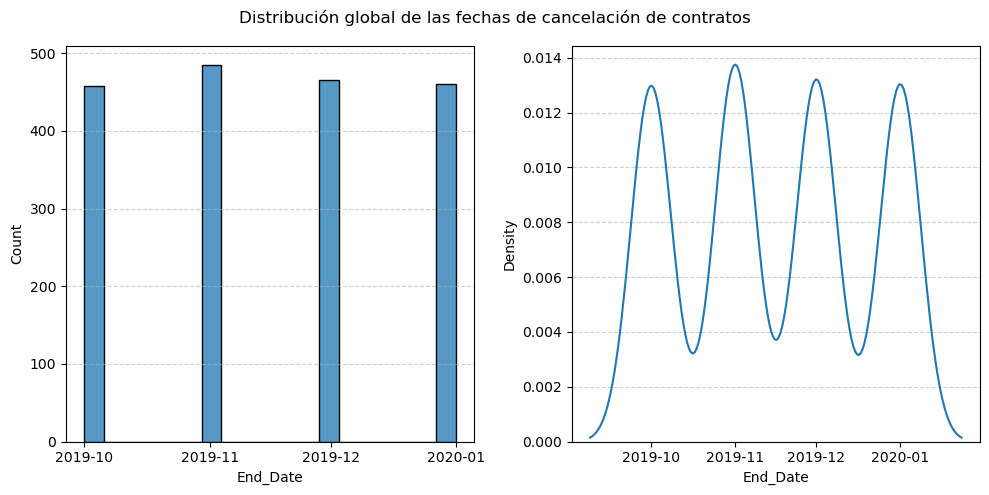

In [21]:
# Histrograma y boxplot para el analisis de fechas iniciales
figura, cuadrantes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=contract_df.query('End_Date != "2020-02-01"'), x='End_Date', ax=cuadrantes[0])
sns.kdeplot(data=contract_df.query('End_Date != "2020-02-01"'),x='End_Date', ax=cuadrantes[1])

figura.suptitle('Distribución global de las fechas de cancelación de contratos')

cuadrantes[0].tick_params(
    axis='x',
    # rotation=90
    )

cuadrantes[0].xaxis.set_major_locator(
    mdates.MonthLocator())
cuadrantes[1].xaxis.set_major_locator(
    mdates.MonthLocator())


# Rejilla a ambos gráficos
cuadrantes[0].grid(axis='y', linestyle='--', alpha=0.6)
cuadrantes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

En el gráfico de arriba __no__ se consideró la fecha de cancelación de __2020-02-01__ ya que es la fecha que se sustituyo por el valor de __'No'__, es decir lo clientes que no han cancelado sus contratos. Podemos observar que la cancelación sólo se dio en cuatro fechas a lo largo de los 7 años de datos proporcionados. Esto contrasta con las fechas de apertura de contrato que son muy variadas y se mantienen a lo largo de los 7 años abarcando desde __2013-10-01__ hasta __2020-02-01__.

#### Columna 'Type', 'Paperless_Billing' y 'Payment_Method'

Se modificaron los valores de las columnas para respetar el formato __snakecase__. Finalmente se mostraron los valores únicos de cada columna. 

In [22]:
def snakecase(df, columnas):
    '''
    Función que cambia los valores tipo str a minúsculas a partir de columnas de un DataFrame
    '''
    for columna in columnas:
        df[columna] = df[columna].str.lower()
    return df

In [23]:
def unique(df, columnnas):
    '''
    Función que permite obtener los valores únicos de columnas específicas de un DataFrame
    '''
    unique_values = []
    for columna in columnnas:
        unique_values.append(df[columna].unique())
    return unique_values

In [24]:
#Creación de lista de columnas a cambiar a formato snakecase

contract_sc = ['Type', 'Paperless_Billing', 'Payment_Method']
contract_df = snakecase(contract_df, contract_sc)

In [25]:
contract_df.head()

,Customer_ID,Begin_Date,End_Date,Type,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,7590-VHVEG,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,2020-02-01,one year,no,mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70.70,151.65


In [26]:
#Revisión de valores únicos por columna
display(unique(contract_df, contract_sc))

[array(['month-to-month', 'one year', 'two year'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['electronic check', 'mailed check', 'bank transfer (automatic)',
        'credit card (automatic)'], dtype=object)]

Se eliminó el segmento de string '(automatico)' de la en el caso de las transferencias bancarias y las tarjetas de credito ya que no aportaban información útil pues no existian pagos similares que no fueran realizados de forma automática.

In [27]:
contract_df['Payment_Method'] = contract_df['Payment_Method'].replace('bank transfer (automatic)', 'bank transfer')
contract_df['Payment_Method'] = contract_df['Payment_Method'].replace('credit card (automatic)', 'credit card')
display(contract_df['Payment_Method'].unique())

array(['electronic check', 'mailed check', 'bank transfer', 'credit card'],
      dtype=object)

In [28]:
display(contract_df)

,Customer_ID,Begin_Date,End_Date,Type,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,7590-VHVEG,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,2020-02-01,one year,no,mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,2020-02-01,one year,no,bank transfer,42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,one year,yes,mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,2020-02-01,one year,yes,credit card,103.20,7362.9
7040,4801-JZAZL,2019-03-01,2020-02-01,month-to-month,yes,electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01,month-to-month,yes,mailed check,74.40,306.6


In [29]:
# Distribución de los tipos de contrato
contract_types = contract_df.groupby(['Type', 'End_Date'])['Customer_ID'].count().reset_index()
contract_types.info()
display(contract_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Type         15 non-null     object        
 1   End_Date     15 non-null     datetime64[ns]
 2   Customer_ID  15 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 492.0+ bytes


,Type,End_Date,Customer_ID
0,month-to-month,2019-10-01,394
1,month-to-month,2019-11-01,429
2,month-to-month,2019-12-01,419
3,month-to-month,2020-01-01,413
4,month-to-month,2020-02-01,2220
5,one year,2019-10-01,56
6,one year,2019-11-01,39
7,one year,2019-12-01,34
8,one year,2020-01-01,37
9,one year,2020-02-01,1307


In [30]:
contract_types_churned = contract_types.query('End_Date != "2020-02-01"')
contract_types_no_churned = contract_types.query('End_Date == "2020-02-01"')
display(contract_types_churned)
print
display(contract_types_no_churned)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9128\1568651433.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  contract_types_churned = contract_types.query('End_Date != "2020-02-01"')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9128\1568651433.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  contract_types_no_churned = contract_types.query('End_Date == "2020-02-01"')


,Type,End_Date,Customer_ID
0,month-to-month,2019-10-01,394
1,month-to-month,2019-11-01,429
2,month-to-month,2019-12-01,419
3,month-to-month,2020-01-01,413
5,one year,2019-10-01,56
6,one year,2019-11-01,39
7,one year,2019-12-01,34
8,one year,2020-01-01,37
10,two year,2019-10-01,8
11,two year,2019-11-01,17


,Type,End_Date,Customer_ID
4,month-to-month,2020-02-01,2220
9,one year,2020-02-01,1307
14,two year,2020-02-01,1647


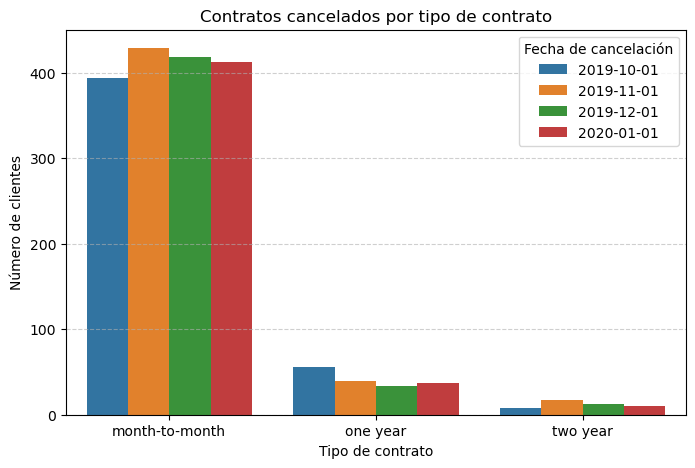

In [31]:
# Gráfico de barras para mostrar la distribución por tipo de contrato
plt.figure(figsize=(8, 5))
sns.barplot(data=contract_types_churned,
            x='Type',
            y='Customer_ID', 
            hue=contract_types_churned['End_Date'].dt.strftime('%Y-%m-%d'),
            palette='tab10')
plt.title('Contratos cancelados por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Fecha de cancelación', loc='upper right')
plt.show()

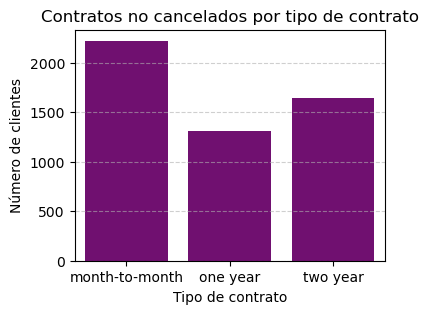

In [32]:
# Gráfico de barras para mostrar la distribución por tipo de contrato
plt.figure(figsize=(4, 3))
sns.barplot(data=contract_types_no_churned,
            x='Type',
            y='Customer_ID',
            color='purple'
            )
plt.title('Contratos no cancelados por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Se observó que la cantidad de contratos en las cuatro posibles fechas de cancelación son muy próximas entre sí, sin embargo la cantidad de contratos que no son cancelados son mayores en todas las categorias de contratos posibles.

#### Columna 'TotalCharges'
Al tratar convertir el tipo de varaible de la columna 'TotalCharge' a __float__ usando el método __.to_numeric()__ se observó que se producia un error debido a la presencia e cadenas vacias __' '__ en la columna que no son señaladas por el método __.info()__ como valores ausentes. Por lo tanto se utilizó __.replace()__ para sustituir las cadenas vacias por __'0'__ y posteriormente utiizar __.to_numeric()__.

In [33]:
contract_df['Total_Charges'] = contract_df['Total_Charges'].replace(' ', '0')
contract_df['Total_Charges'] = pd.to_numeric(contract_df['Total_Charges'], errors='coerce')
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        7043 non-null   object        
 1   Begin_Date         7043 non-null   datetime64[ns]
 2   End_Date           7043 non-null   datetime64[ns]
 3   Type               7043 non-null   object        
 4   Paperless_Billing  7043 non-null   object        
 5   Payment_Method     7043 non-null   object        
 6   Monthly_Charges    7043 non-null   float64       
 7   Total_Charges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


#### Duplicados explícitos
Se utilizó el método __.duplicated__ para buscar duplicados explícitos en el dataframe.

In [34]:
contract_duplicates = contract_df.duplicated().sum()
print('Los valores duplicados en el DataFrame users son:', contract_duplicates)

Los valores duplicados en el DataFrame users son: 0


#### Guardar DataFrame

In [35]:
contract_df.to_csv(path+r'\.ipynb_checkpoints\contract_df.csv', index=False)

#### Resumen de DataFrame Contract_df
Para predecir el abandono de los clientes se requiere definir una ventana temporal en la cual será valida la predicción, considerando la diferencia entre las fechas de apertura y cancelación del contrato. 
El valor máximo del intervalo de la ventana temporal sería para un contrato abierto el __2013-10-01__ y que no se cancelara, es decir, hasta __2020-02-01__ cubriendo una ventana de 7 años y 3 meses. Sin embargo, este modelo no podría predecir ninguna cancelación debido a que en dicha ventana no hay cancelaciones. Por lo anterior la ventana de predicción se escogió inferior. 
Considerando la distribución en la apertura y que los contratos pueden ser de tres tipos: mensuales, anuales o bianuales de los contratos se propone utilizar una ventana de __6 años__ que abarqué desde __2014-01-01__ hasta __2020-01-01__, considerando así como fecha de cancelación las cancelaciones en __2020-01-01__ y las filas con __2020-02-01__ serían equivalentes a que no hubo cancelación del servicio.

### DataFrame internet_df

In [36]:
original_internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [37]:
display(original_internet_df.head(10))

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


El DataFrame __internet_df__ únicamente contenia valores tipo object (string) y no presentaba valores ausentes. Debido a que los valores tipo object tienen la primer letra en mayúscula puede ser que hubiera datos que tuvieran las respuestas con un formato diferente pudiendo ser todo en mayúsculas, todo en minúsuculas que hubiera cadenas vacias. Para explorar dicha posibilidad se aplicó la función __unique__ y __sankecase__ aplicandolas a cada columna del DataFrame excluyendo la columna __customerID__.

#### Corregir datos

In [38]:
internet_df = original_internet_df.copy()
internet_sc = internet_df.drop('customerID', axis=1).columns
print(unique(original_internet_df, internet_sc))

[array(['DSL', 'Fiber optic'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Yes', 'No'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object)]


Se debe de cambiar los valores de las columnas a snakecase ya que se observó que la primera letra es mayúscula y podría generar duplicación de valores. Los encabezados deben de ser modificados para que la separación de las palabras se haga mediante un guión bajo y sean consistentes con el DataFrame de contracts_df.

#### Cambio a formato snakecase

In [39]:
internet_df = snakecase(internet_df, internet_sc)

In [40]:
internet_df.columns

Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [41]:
internet_df = internet_df.rename(columns={
    'customerID': 'Customer_ID',
    'InternetService': 'Internet_Service',
    'OnlineSecurity': 'Online_Security',
    'OnlineBackup': 'Online_Backup',
    'DeviceProtection': 'Device_Protection',
    'TechSupport': 'Tech_Support',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Movies'
})

In [42]:
display(internet_df)

,Customer_ID,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies
0,7590-VHVEG,dsl,no,yes,no,no,no,no
1,5575-GNVDE,dsl,yes,no,yes,no,no,no
2,3668-QPYBK,dsl,yes,yes,no,no,no,no
3,7795-CFOCW,dsl,yes,no,yes,yes,no,no
4,9237-HQITU,fiber optic,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,dsl,yes,no,yes,yes,yes,yes
5513,2234-XADUH,fiber optic,no,yes,yes,no,yes,yes
5514,4801-JZAZL,dsl,yes,no,no,no,no,no
5515,8361-LTMKD,fiber optic,no,no,no,no,no,no


#### Duplicados explícitos

In [43]:
internet_duplicates = internet_df.duplicated().sum()
print('Los valores duplicados en el DataFrame users son:', internet_duplicates)

Los valores duplicados en el DataFrame users son: 0


#### Guardar DataFrame

In [44]:
internet_df.to_csv(path+r'\.ipynb_checkpoints\internet_df.csv', index=False)

#### Resumen de DataFrame internet_df
El DataFrame __internet_df__ se debe de unir de forma interna con el de __contracts_df__ para realizar un análisis más profundo que sea útil para el entrenamiento.

Es importante recalcar que el DataFrame consta de 5517 filas y 8 columnas, sin valores nulos y que contiene en su totalidad variables tipo string. Es importante señalar que este numero de filas es inferior a las del DataFrame de __contracts_df__ lo cual indica que no todos los contratos implican la contratación de internet o que el DataFrame __internet_df__ esta incompleto. El DataFrame mostró que el servicio de internet contempla cobertura de internet al cliente en dos posibles modalidades DSL o Fiber optic y que el cliente puede decidir si desea uno o más complementos del servicio que fueron registrados desde la columna __OnlineSecurity__ hasta __StreamingMovies__.

### DataFrame personal_df

In [45]:
original_personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [46]:
display(original_personal_df.head(10))

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [47]:
print(original_personal_df['SeniorCitizen'].value_counts())

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


El DataFrame __original_personal_df__ mostró 7043 filas y 5 columnas de las cuales, sin la presencia de valores nulos convencionales. El númeor de filas coincidió con el del DataFrame __original_contract_df__. Todos los valores de las columnas a excepción de __SeniorCitizen__ son de tipo string, __SeniorCitizen__ es del tipo int pero indica si la persona es jubilada o no conteniendo dos posibles respuestas 0 o 1 por lo que debería de ser object. La columna __gender__ y __customerID__ deben de ser modificadas permitiendo que la primera letra sea mayúscula y en el caso de la columna __customerID__ se debe de separar las palabras con un guión bajo para respetar la nomenclatura del resto de DataFrames. Los valores a de todas las columnas con excpeción de __customerID__ deben ser modificados para respetar el formato snakecase.

#### Corregir los datos

In [48]:
personal_df = original_personal_df.copy()

In [49]:
# Se eliminó la columna 'customerID'
personal_sc = ['gender', 'Partner', 'Dependents']
print(unique(personal_df, personal_sc))

[array(['Female', 'Male'], dtype=object), array(['Yes', 'No'], dtype=object), array(['No', 'Yes'], dtype=object)]


#### Cambio a formato snakecase

In [50]:
personal_df = snakecase(personal_df, personal_sc)
display(personal_df)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,female,0,yes,no
1,5575-GNVDE,male,0,no,no
2,3668-QPYBK,male,0,no,no
3,7795-CFOCW,male,0,no,no
4,9237-HQITU,female,0,no,no
...,...,...,...,...,...
7038,6840-RESVB,male,0,yes,yes
7039,2234-XADUH,female,0,yes,yes
7040,4801-JZAZL,female,0,yes,yes
7041,8361-LTMKD,male,1,yes,no


In [51]:
# Cambiar encabezados
personal_df = personal_df.rename(columns={
    'customerID':'Customer_ID',
    'gender':'Gender',
    'SeniorCitizen':'Senior_Citizen',
    'Partner':'Partner',
    'Dependents':'Dependents'
})
display(personal_df.head())


,Customer_ID,Gender,Senior_Citizen,Partner,Dependents
0,7590-VHVEG,female,0,yes,no
1,5575-GNVDE,male,0,no,no
2,3668-QPYBK,male,0,no,no
3,7795-CFOCW,male,0,no,no
4,9237-HQITU,female,0,no,no


In [52]:
# Cambio a object para la columna Senior_Citizen
personal_df['Senior_Citizen'] = personal_df['Senior_Citizen'].astype(str)
print(personal_df['Senior_Citizen'].dtypes)

object


#### Duplicados explícitos

In [53]:
personal_duplicates = personal_df.duplicated().sum()
print('Los valores duplicados en el DataFrame users son:', personal_duplicates)

Los valores duplicados en el DataFrame users son: 0


#### Guardar DataFrame

In [54]:
personal_df.to_csv(path+r'\.ipynb_checkpoints\personal_df.csv', index=False)

#### Resumen del DataFrame __personal_df__
Se modificaron los datos para que siguieran el formato snakecase. Posteriormente deberan de unirse con el DataFrame __contracts_df__ de forma interna para continuar un análisis más profundo.

### DataFrame phone_df

In [55]:
original_phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [56]:
display(original_phone_df.head())

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


El DataFrame __original_phone_df__ consta de 6361 filas y dos columnas que contenian variables tipo string. No se presentaron valores nulos convencionales. La filas son menores que las encontradas en el DataFrame __original_contract_df__ lo cual sugirió que no todos los contratos contemplan el servicio de multiples lineas telefónicas. Se modifica el formato de la columna __MultipleLines__ para respetar el formato de los DataFrames previos y los valores se cambian al formato snakecase.

#### Corregir datos

In [57]:
phone_df = original_phone_df

In [58]:
phone_sc = ['MultipleLines']
print(unique(phone_df, phone_sc))

[array(['No', 'Yes'], dtype=object)]


In [59]:
phone_df = snakecase(phone_df, phone_sc)
display(phone_df)

,customerID,MultipleLines
0,5575-GNVDE,no
1,3668-QPYBK,no
2,9237-HQITU,no
3,9305-CDSKC,yes
4,1452-KIOVK,yes
...,...,...
6356,2569-WGERO,no
6357,6840-RESVB,yes
6358,2234-XADUH,yes
6359,8361-LTMKD,yes


In [60]:
phone_df = phone_df.rename(columns={
    'customerID':'Customer_ID',
    'MultipleLines':'Multiple_Lines'
})
display(phone_df)

,Customer_ID,Multiple_Lines
0,5575-GNVDE,no
1,3668-QPYBK,no
2,9237-HQITU,no
3,9305-CDSKC,yes
4,1452-KIOVK,yes
...,...,...
6356,2569-WGERO,no
6357,6840-RESVB,yes
6358,2234-XADUH,yes
6359,8361-LTMKD,yes


#### Guardar DataFrame

In [61]:
phone_df.to_csv(path+r'\.ipynb_checkpoints\phone_df.csv', index=False)

#### Resumen de DataFrame phone_df
Se modificó el DataFrame para respetar el formato snakecase en los valores y el formato de letras mayúsculas iniciales en los encabezados de las columnas. 

El número de registros de este DatraFrame es inferior al de contracts_df, esto indica que hay información faltante para algunos clientes, ya que la columna __Multiple_Lines__ indica una respuesta boolanea (si/no) invariablemente de si un cliente acepta o no el servico de multiples líneas telefónicas debería de tener un contrato, por lo que si hay más contratos que registros en este DataFrame se podría explicar como una falta de registros en este DataFrame.

### Unión de DataFrames

Se procedió a unir los DataFrames de forma interna mediante la columna __Customer_ID__ de forma interna para obtener un registro en donde todos los clientes tuvieran la información completa de los datasets de contract, internet, personal y phone. Posteriormente, se realizó un filtrado por la columna __End_Date__ para considerar las filas unicamente con fechas del __2020-01-01__ y __2020-02-01__ indicando correspondientemente cancelación y no cancelación del servicio. En el caso de la columna __Begin_Date__ se consideró fechas iguales o mayores a __2014-01-01__. Ambas condiciones de filtrado de fechas permitiría obtener un DataFrame con un intervalo de tiempo de 6 años en el cual se entrenará el modelo. 

In [62]:
# Unión interna de contract_df y personal_df

df_1_union = contract_df.merge(personal_df, on='Customer_ID')
df_1_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        7043 non-null   object        
 1   Begin_Date         7043 non-null   datetime64[ns]
 2   End_Date           7043 non-null   datetime64[ns]
 3   Type               7043 non-null   object        
 4   Paperless_Billing  7043 non-null   object        
 5   Payment_Method     7043 non-null   object        
 6   Monthly_Charges    7043 non-null   float64       
 7   Total_Charges      7043 non-null   float64       
 8   Gender             7043 non-null   object        
 9   Senior_Citizen     7043 non-null   object        
 10  Partner            7043 non-null   object        
 11  Dependents         7043 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 660.4+ KB


Se observó que el número de filas se conservo antes y después de la unión con .merge() por lo que se corrobora el supesto de que cada contrato tienen información asociada al personal relacionada con el mismo. 

In [63]:
# Unión interna de df_1_union y phone_df
df_2_union = df_1_union.merge(phone_df, on='Customer_ID')
df_2_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        6361 non-null   object        
 1   Begin_Date         6361 non-null   datetime64[ns]
 2   End_Date           6361 non-null   datetime64[ns]
 3   Type               6361 non-null   object        
 4   Paperless_Billing  6361 non-null   object        
 5   Payment_Method     6361 non-null   object        
 6   Monthly_Charges    6361 non-null   float64       
 7   Total_Charges      6361 non-null   float64       
 8   Gender             6361 non-null   object        
 9   Senior_Citizen     6361 non-null   object        
 10  Partner            6361 non-null   object        
 11  Dependents         6361 non-null   object        
 12  Multiple_Lines     6361 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 646.2

Se observó que al unir los DataFrames la cantidad de filas disminuyo, siendo 6361 filas las resultantes de la unión, número que coincide con el número de filas iniciales del DataFrame __phone_df__. Lo cual podría indicar como se proponía arriba que hay registros faltantes en el DataFrame de __phone_df__ o en su defecto que algunos contratos no contemplan el servicio telefónico y unicamente incluyen otro tipo de servicios, sin embargo, dentro de la descripción de los servicios de Telecom se señala que el servicio telefónico se refiera a un servicio de multilíneas, por lo que se interpreto que la ausencia de clientes en este DataFrame esta relacionada la falta de registros, ya que la columna __Multiple_Lines__ abarca los dos posibles escenarios, en el que se brinda o no el servicio telefónico a un cliente. Este razonamiento fue por el cual se escogió hacer una unión interna de ambos DataFrames.

In [64]:
# Unión interna de df_2_union e internet_df
df_3_union = df_2_union.merge(internet_df, on='Customer_ID')
df_3_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        4835 non-null   object        
 1   Begin_Date         4835 non-null   datetime64[ns]
 2   End_Date           4835 non-null   datetime64[ns]
 3   Type               4835 non-null   object        
 4   Paperless_Billing  4835 non-null   object        
 5   Payment_Method     4835 non-null   object        
 6   Monthly_Charges    4835 non-null   float64       
 7   Total_Charges      4835 non-null   float64       
 8   Gender             4835 non-null   object        
 9   Senior_Citizen     4835 non-null   object        
 10  Partner            4835 non-null   object        
 11  Dependents         4835 non-null   object        
 12  Multiple_Lines     4835 non-null   object        
 13  Internet_Service   4835 non-null   object        
 14  Online_S

El DataFrame __internet_df__ constaba de 5517 filas y después de la unión hay una disminución a 4835 filas. Esto podría indicar o que no todos los contratos de los clientes contemplan el servicio de internet o que el DataFrame de __internet_df__ tiene registros incompletos. El DataFrame __internet_df__ mostró que el servicio de internet contempla cobertura de internet al cliente en dos posibles modalidades DSL o Fiber optic y que el cliente puede decidir si desea uno o más complementos del servicio que fueron registrados desde la columna __OnlineSecurity__ hasta __StreamingMovies__. Sin embargo, en este DataFrame no existe una columna que permita representar a los clientes que no tienen el servicio de internet.
Por lo anterior la unión interna de arriba mostraría sólo a los clientes que tienen contratado el servicio de internet, pero si hay clientes que no tienen dicho servicio no estarán representados en los datos, lo cual crearía un sesgo en el modelo.
Por lo anterior se prefirió optar por realizar una unión externa entre ambos DataFrames para representar así a los clientes que contrataron el servico telefónico pero no el de internet.

In [65]:
# Unión interna de df_2_union e internet_df
df_out_union = df_2_union.merge(internet_df, on='Customer_ID', how='outer')
df_out_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        7043 non-null   object        
 1   Begin_Date         6361 non-null   datetime64[ns]
 2   End_Date           6361 non-null   datetime64[ns]
 3   Type               6361 non-null   object        
 4   Paperless_Billing  6361 non-null   object        
 5   Payment_Method     6361 non-null   object        
 6   Monthly_Charges    6361 non-null   float64       
 7   Total_Charges      6361 non-null   float64       
 8   Gender             6361 non-null   object        
 9   Senior_Citizen     6361 non-null   object        
 10  Partner            6361 non-null   object        
 11  Dependents         6361 non-null   object        
 12  Multiple_Lines     6361 non-null   object        
 13  Internet_Service   5517 non-null   object        
 14  Online_S

#### Guardar DataFrame

In [66]:
df_out_union.to_csv(path+r'\.ipynb_checkpoints\df_out_union.csv', index=False)

### Filtrado por fechas

El filtro consideró las fechas entre __2014-01-01__ y __2020-01-01__, considerando así como fecha de cancelación las cancelaciones en __2020-01-01__ y las filas con __2020-02-01__ serían equivalentes a que no hubo cancelación del servicio. Para ello primero se filtraron las columnas __Begin_Date__ seguidas de __End_Date__.  

In [67]:
# Aplicando filtro a 'Begin_Date'
df_out_union = df_out_union[
    (df_out_union['Begin_Date'] >= '2014-01-01') & 
    (df_out_union['Begin_Date'] < '2020-01-01')
    ]
df_out_union.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6130 entries, 0 to 7041
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        6130 non-null   object        
 1   Begin_Date         6130 non-null   datetime64[ns]
 2   End_Date           6130 non-null   datetime64[ns]
 3   Type               6130 non-null   object        
 4   Paperless_Billing  6130 non-null   object        
 5   Payment_Method     6130 non-null   object        
 6   Monthly_Charges    6130 non-null   float64       
 7   Total_Charges      6130 non-null   float64       
 8   Gender             6130 non-null   object        
 9   Senior_Citizen     6130 non-null   object        
 10  Partner            6130 non-null   object        
 11  Dependents         6130 non-null   object        
 12  Multiple_Lines     6130 non-null   object        
 13  Internet_Service   4718 non-null   object        
 14  Online_Securi

In [68]:
# Aplicando filtro a 'End_Date'
df_out_union = df_out_union[
    (df_out_union['End_Date'] == '2020-01-01') |
    (df_out_union['End_Date'] == '2020-02-01')
]
df_out_union.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4849 entries, 0 to 7041
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        4849 non-null   object        
 1   Begin_Date         4849 non-null   datetime64[ns]
 2   End_Date           4849 non-null   datetime64[ns]
 3   Type               4849 non-null   object        
 4   Paperless_Billing  4849 non-null   object        
 5   Payment_Method     4849 non-null   object        
 6   Monthly_Charges    4849 non-null   float64       
 7   Total_Charges      4849 non-null   float64       
 8   Gender             4849 non-null   object        
 9   Senior_Citizen     4849 non-null   object        
 10  Partner            4849 non-null   object        
 11  Dependents         4849 non-null   object        
 12  Multiple_Lines     4849 non-null   object        
 13  Internet_Service   3519 non-null   object        
 14  Online_Securi

In [69]:
# Corroborando los cambios en 'End_Date' y 'Begin_Date'

print(df_out_union['Begin_Date'].unique())
print()
print(df_out_union['End_Date'].unique())

<DatetimeArray>
['2019-05-01 00:00:00', '2019-09-01 00:00:00', '2018-12-01 00:00:00',
 '2014-03-01 00:00:00', '2014-11-01 00:00:00', '2019-07-01 00:00:00',
 '2014-09-01 00:00:00', '2014-02-01 00:00:00', '2015-12-01 00:00:00',
 '2018-03-01 00:00:00', '2019-11-01 00:00:00', '2015-07-01 00:00:00',
 '2015-08-01 00:00:00', '2017-12-01 00:00:00', '2014-05-01 00:00:00',
 '2017-01-01 00:00:00', '2016-01-01 00:00:00', '2014-08-01 00:00:00',
 '2014-07-01 00:00:00', '2016-07-01 00:00:00', '2015-03-01 00:00:00',
 '2019-02-01 00:00:00', '2017-11-01 00:00:00', '2018-01-01 00:00:00',
 '2017-03-01 00:00:00', '2017-09-01 00:00:00', '2014-10-01 00:00:00',
 '2016-11-01 00:00:00', '2016-10-01 00:00:00', '2016-09-01 00:00:00',
 '2019-08-01 00:00:00', '2017-08-01 00:00:00', '2014-04-01 00:00:00',
 '2015-05-01 00:00:00', '2015-04-01 00:00:00', '2018-10-01 00:00:00',
 '2017-06-01 00:00:00', '2017-05-01 00:00:00', '2019-04-01 00:00:00',
 '2015-01-01 00:00:00', '2016-06-01 00:00:00', '2019-12-01 00:00:00',
 '20

### Gestión de valores ausentes

Las columnas provenientes del DataFrame de __internet_df__ contenian valores ausentes típicos debido a que se consideraron clientes a los que unicamente se les brindo el servicio telefónico. Como dichas columnas contienen valores tipo string, y en su mayoría booleanas, se sustituyeron los valores ausentes por el string __'no'__ indicando así que no se les proporciono el servicio de internet ni ningun complemento del mismo.

In [70]:
# Selección de las columnas con valores ausentes
cols = internet_df.columns.drop('Customer_ID')
print(cols)

Index(['Internet_Service', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies'],
      dtype='object')


In [71]:
# Sustitución de 'No' por NaN en cols
for col in cols:
    df_out_union[col] = df_out_union[col].fillna(value='no')

In [72]:
# Corroborar la presencia de NaN

df_out_union.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4849 entries, 0 to 7041
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        4849 non-null   object        
 1   Begin_Date         4849 non-null   datetime64[ns]
 2   End_Date           4849 non-null   datetime64[ns]
 3   Type               4849 non-null   object        
 4   Paperless_Billing  4849 non-null   object        
 5   Payment_Method     4849 non-null   object        
 6   Monthly_Charges    4849 non-null   float64       
 7   Total_Charges      4849 non-null   float64       
 8   Gender             4849 non-null   object        
 9   Senior_Citizen     4849 non-null   object        
 10  Partner            4849 non-null   object        
 11  Dependents         4849 non-null   object        
 12  Multiple_Lines     4849 non-null   object        
 13  Internet_Service   4849 non-null   object        
 14  Online_Securi

In [73]:
# Comprobación en las columnas modificadas

for col in cols:
    isna = df_out_union[col].isna().sum()
    print(f'La cantindad de valores ausentes en la columna {col} es: {isna}')

La cantindad de valores ausentes en la columna Internet_Service es: 0
La cantindad de valores ausentes en la columna Online_Security es: 0
La cantindad de valores ausentes en la columna Online_Backup es: 0
La cantindad de valores ausentes en la columna Device_Protection es: 0
La cantindad de valores ausentes en la columna Tech_Support es: 0
La cantindad de valores ausentes en la columna Streaming_TV es: 0
La cantindad de valores ausentes en la columna Streaming_Movies es: 0


In [74]:
# Comprobación de que la columna de Internet_Service es legible y comprensible con la sustitución

print(df_out_union['Internet_Service'].value_counts())

Internet_Service
fiber optic    2077
dsl            1442
no             1330
Name: count, dtype: int64


### Relaciones entre las variables númericas

Aunque la columna __End_Date__ es una columna con variables tipo datetime hay que considerar que al tratarse de la columna __target__ en el problema de clasificación se debe cambiar a tipo string y sustituir los valores por __0__ y __1__.

In [75]:
df = df_out_union.copy()

In [76]:
# Cambio de la columna End_Date a tipo string

df['End_Date'] = df['End_Date'].astype(str)
print(df['End_Date'].dtypes)

object


In [77]:
# Cambio por '0' para '2020-02-01' y '1' para '2020-01-01'

df['End_Date'] = df['End_Date']\
    .replace({'2020-02-01':'0',
              '2020-01-01': '1'})

print(df['End_Date'].unique())

['0' '1']


#### Guardar DataFrame

In [78]:
df.to_csv(path+r'\.ipynb_checkpoints\df.csv', index=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9128\4059773121.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.axes[2, 0].set_xticklabels(g.axes[2, 0].get_xticklabels(), rotation=90)


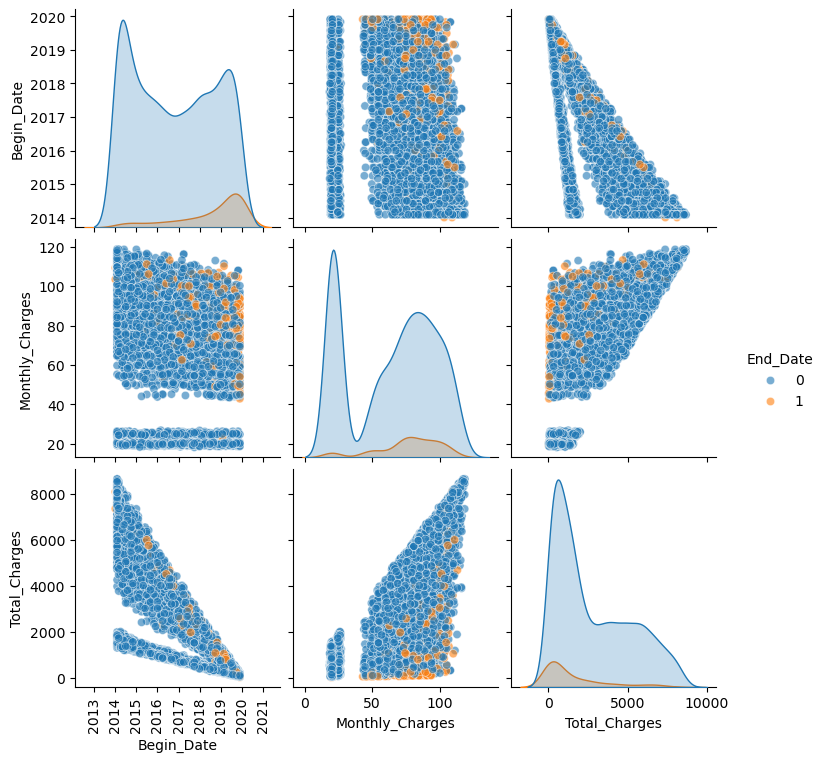

In [79]:
# Graficar variables númericas y agrupando por clientes que cancelaron y que no cancelaron
cols = ['Begin_Date', 'Monthly_Charges', 'Total_Charges'] 
g = sns.pairplot(data=df, vars=cols, hue='End_Date', plot_kws={'alpha': 0.6})
g.axes[2, 0].set_xticklabels(g.axes[2, 0].get_xticklabels(), rotation=90)
plt.show()

__Segmentación por clientes que cancelaron y clientes que no cancelaron__ 

Monthly_Charges vs. Begin_Date
* Se puede observar que hay dos poblaciones, una que tiene cargos mensuaeles inferiores a 40 y otra que tiene cargos mensuales superiores a 40. De igual forma podemos observar que este comportamiento se mantiene a lo largo de los años y de forma practicamente inalterado. 

Total_Charges vs. Begin_Date
* Se observó que hay dos poblaciones con aspecto triangular. La más población más pequeña muestra que hay pocos cargos acumulados. Como la fecha de cancelación considerada para el conjunto de datos es la misma no podemos atribuirlo a cancelaciones al poco tiempo de haber sido contratado el servicio. Sino, que es más probable a que se deban a clientes cuyo consumo es muy inferior al consumidor promedio, lo cual podría deberse a que sólo tiene contratado el servicio de internet o de telefono pero no ambos a la vez. Mientras que la población, representada por el triángulo más grande podría atribuirse a los clientes que contrataron ambos servicios que sabemos por análisis previos que son los más numerosos en el dataset. 
* Se observó que hay una relación directamente proporcional entre Begin_Date y Total_Charges, lo cual es de esperarse porque a mayor tiempo que un cliente ha mantenido el servicio mayor cantidad de cargos totales a pagado. 

Montly_Charges vs. Total_Charges
* Existe una relación directamente proporcional entre Montly_Charges y Total_Charges pues a mayor ingreso mensual mayor cantidad de ingreso total. 
* Se observaron dos poblaciones. Aquella con la cantidad de ingreso menor contiene el menor ingreso total y mensual del total de los clientes. Esto es lógico y podemos apreciar que aquellos clientes con menor cargos mensuales nuevamente son aquellos que tienen cargos mensuales inferiores a 40, sin embargo el total de cargos acumulados es variable. 

Impresiones generales
* Relación de las variables con End_Date
La distribución de los valores de End_Date, 0 y 1, se observa en ambas poblaciones en cada relación de variables estudida por lo que es poco probable que estos factores mantengan una relación determinante por si mismos para predecir la cancelació o no del servicio.
* La mayoría de los clientes opotaron por no cancelar sus contratos.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9128\3414827669.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.axes[2, 0].set_xticklabels(g.axes[2, 0].get_xticklabels(), rotation=90)


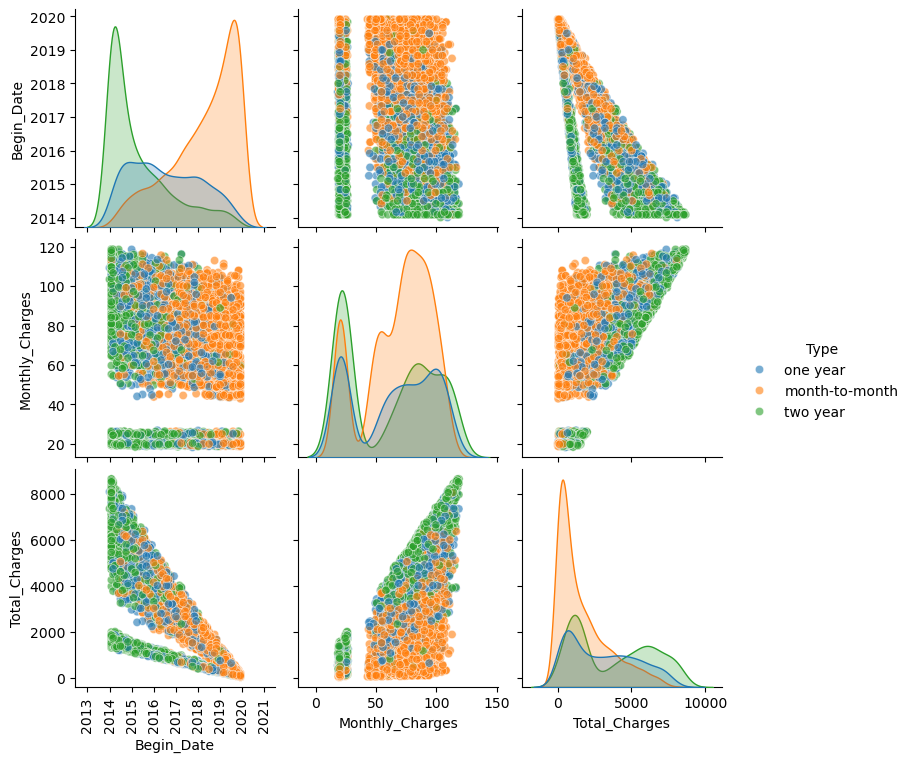

In [80]:
# Graficar variables númericas y agrupando por clientes que cancelaron y que no cancelaron
cols = ['Begin_Date', 'Monthly_Charges', 'Total_Charges'] 
g = sns.pairplot(data=df, vars=cols, hue='Type', plot_kws={'alpha': 0.6})
g.axes[2, 0].set_xticklabels(g.axes[2, 0].get_xticklabels(), rotation=90)
plt.show()

__Segmentación por tipos de contrato__ 

Monthly_Charges vs. Begin_Date
* Aunque la mayoría de los contratos son de tipo mensual, se observa que los clientes más nuevos tienden a preferir los contratos mensuales y que los clientes más antiguos optan por contratos de mayor duración. 
* Se observan dos poblaciones, una con cargos mensuales inferiores a 40 y la más grande con cargos superiores a dicho monto. Es importante notar que en la población con los cargos inferiores a 40 la mayoria de los contratos son del tipo bianual lo cual contrasta con la población con cargos superiores a 40.

Total_Charges vs. Begin_Date
* Se observa que los clientes más antiguos optan por contratos a dos años mientras que los más nuevos prefieren contratos mensuales y paulatinamente migran a contratos anuales.
* Los clientes con contratos mensuales son los que menores cargos totales tienen.
* Los clientes con contratos bianuales son los que reportaron la mayor cantidad de cargos totales.
* Se observa que hay dos poblaciones y aquella con menor cantidad de cargos opta por contratos anuales en su mayoría.

Montly_Charges vs. Total_Charges
* Existe una relación directamente proporcional entre Montly_Charges y Total_Charges pues a mayor ingreso mensual mayor cantidad de ingreso total.
* Se observaron dos poblaciones. Aquella con la cantidad de ingreso menor contiene el menor ingreso total y mensual del total de los clientes. Esto es lógico y podemos apreciar que aquellos clientes con menor cargos mensuales nuevamente son aquellos que tienen cargos mensuales inferiores a 40, sin embargo el total de cargos acumulados es variable. 
* Los clientes que gastan más tienen contratos bianuales en su mayoria.

Impresiones generales
* Relación de las variables con Type
La distribución de los valores Type mostró una migración de los clientes a los contratos de mayor duración conforme más tiempo cuentan con el servicio.
* La mayoría de los clientes actualmente tiene contratos mensuales.
* La mayor parte de los cargos totales se deben a contratos bianuales.